In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import math

In C:\Users\rahul\.conda\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\rahul\.conda\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\rahul\.conda\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
df = pd.read_csv('AirQuality.csv', parse_dates=True, index_col='From Date')

In [3]:
df.head(3)

,CO,NO,NO2,SO2,ozone,weekday,PM25
From Date,,,,,,,
2019-05-01,0.93,3.40,41.20,3.13,40.99,2,120.54
2019-05-02,0.72,4.04,23.08,2.67,38.39,3,74.99
2019-05-03,0.87,3.62,20.78,2.14,41.14,4,79.15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373 entries, 2019-05-01 to 2020-05-07
Data columns (total 7 columns):
CO         373 non-null float64
NO         373 non-null float64
NO2        373 non-null float64
SO2        373 non-null float64
ozone      373 non-null float64
weekday    373 non-null int64
PM25       373 non-null float64
dtypes: float64(6), int64(1)
memory usage: 23.3 KB


In [5]:
df.index.freq = 'd'

In [6]:
df.tail()

,CO,NO,NO2,SO2,ozone,weekday,PM25
From Date,,,,,,,
2020-05-03,0.90,3.40,22.42,7.13,36.69,6,24.44
2020-05-04,0.84,3.54,24.72,8.24,39.38,0,28.59
2020-05-05,0.97,3.60,22.57,6.88,42.06,1,29.79
2020-05-06,0.96,3.57,22.64,8.10,36.58,2,24.87
2020-05-07,1.05,3.56,24.49,10.42,33.65,3,27.04


In [7]:
df.drop('weekday',axis=1,inplace=True)

In [8]:
len(df.index)

373

In [9]:
df_CO = pd.DataFrame(df['CO'])

In [10]:
#df_CO.head(2)

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

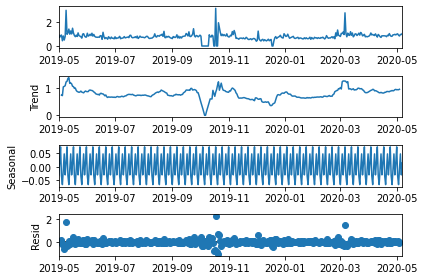

In [144]:
x= seasonal_decompose(df_CO, model='additive')
x.plot();

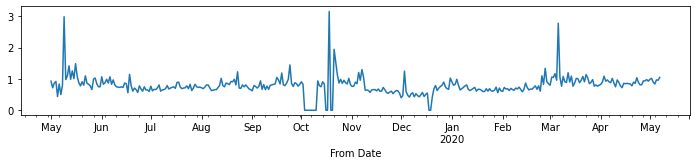

In [12]:
results_CO = seasonal_decompose(df_CO)
results_CO.observed.plot(figsize=(12,2))

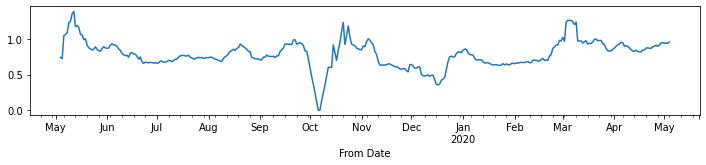

In [13]:
results_CO.trend.plot(figsize=(12,2))

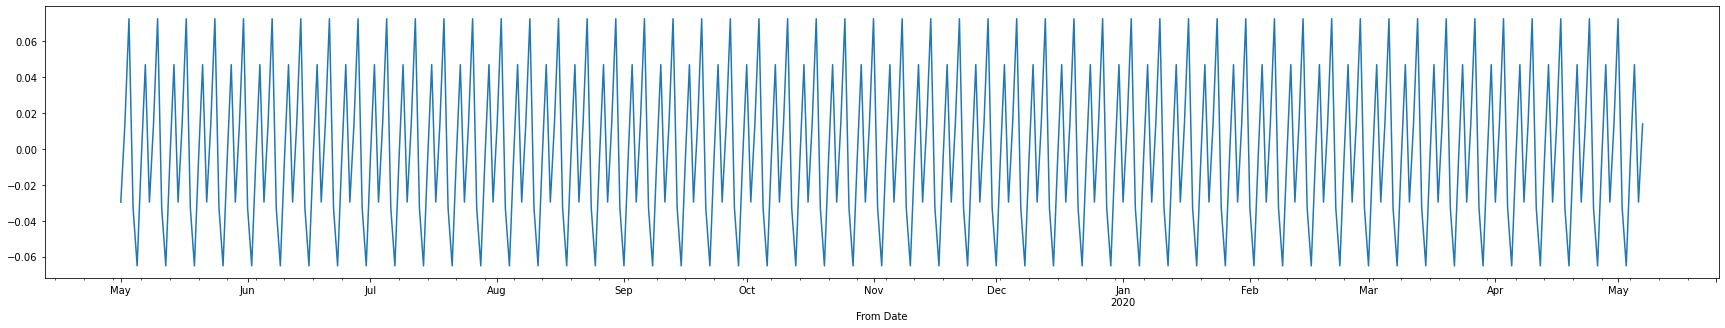

In [14]:
results_CO.seasonal.plot(figsize=(30,5))

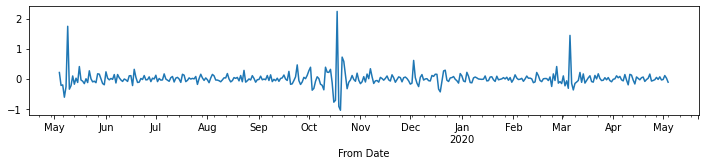

In [15]:
results_CO.resid.plot(figsize=(12,2))

In [16]:
len(df_CO)

373

In [17]:
373-7

366

In [18]:
train_CO = df_CO.iloc[:366]
test_CO = df_CO.iloc[366:]

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler_CO = MinMaxScaler()

In [21]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler_CO.fit(train_CO)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
scaled_train_CO = scaler_CO.transform(train_CO)
scaled_test_CO = scaler_CO.transform(test_CO)

In [23]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
scaled_train_CO

array([[0.2943038 ],
       [0.2278481 ],
       [0.27531646],
       [0.29113924],
       [0.13924051],
       [0.26582278],
       [0.15822785],
       [0.25316456],
       [0.94620253],
       [0.31012658],
       [0.34810127],
       [0.44936709],
       [0.31329114],
       [0.39873418],
       [0.31962025],
       [0.47151899],
       [0.34493671],
       [0.27848101],
       [0.24683544],
       [0.28797468],
       [0.25316456],
       [0.34810127],
       [0.2721519 ],
       [0.26265823],
       [0.24683544],
       [0.20886076],
       [0.3164557 ],
       [0.32594937],
       [0.26582278],
       [0.23734177],
       [0.23734177],
       [0.33860759],
       [0.26265823],
       [0.27848101],
       [0.31329114],
       [0.27531646],
       [0.33860759],
       [0.26265823],
       [0.30696203],
       [0.25632911],
       [0.23734177],
       [0.23417722],
       [0.23101266],
       [0.23734177],
       [0.23101266],
       [0.27531646],
       [0.26898734],
       [0.177

In [25]:
# define generator
n_input = 2
n_features = 1
generator_CO = TimeseriesGenerator(scaled_train_CO, scaled_train_CO, length=n_input, batch_size=1)

In [26]:
#len(scaled_train_CO)

In [27]:
#len(generator_CO)

In [28]:
#scaled_train_CO

In [29]:
# What does the first batch look like?
X,y = generator_CO[0]

In [30]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.2943038 0.2278481]
Predict this y: 
 [[0.27531646]]


In [31]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 7
generator_CO = TimeseriesGenerator(scaled_train_CO, scaled_train_CO, length=n_input, batch_size=1)

In [32]:
# What does the first batch look like?
X,y = generator_CO[0]

In [33]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.2943038  0.2278481  0.27531646 0.29113924 0.13924051 0.26582278
 0.15822785]
Predict this y: 
 [[0.25316456]]


In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [35]:
# define model
model_CO = Sequential()
model_CO.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model_CO.add(Dense(1))
model_CO.compile(optimizer='adam', loss='mse')

In [36]:
model_CO.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [37]:
# fit model
model_CO.fit_generator(generator_CO,epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0107
Epoch 2/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0090
Epoch 3/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0088
Epoch 4/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0087
Epoch 5/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0089
Epoch 6/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0087
Epoch 7/50
359/359 [==============================] - 1s 4ms/step - loss: 0.0087
Epoch 8/50
359/359 [==============================] - 2s 6ms/step - loss: 0.0085
Epoch 9/50
359/359 [==============================] - 2s 6ms/step - loss: 0.0086
Epoch 10/50
359/359 [==============================] - 1s 4ms/step - loss: 0.0085
Epoch 11/50
359/359 [==============================] - 2s 6ms/step - loss: 0.0085
Epoch 12/50
359/359 [==========

In [38]:
model_CO.history.history.keys()

dict_keys(['loss'])

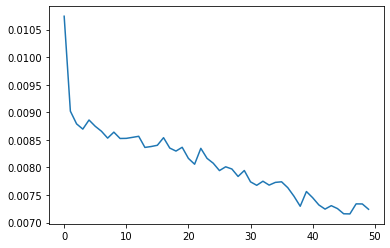

In [39]:
loss_per_epoch = model_CO.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [40]:
first_eval_batch_CO = scaled_train_CO[-7:]

In [41]:
first_eval_batch_CO

array([[0.28164557],
       [0.25632911],
       [0.25949367],
       [0.29746835],
       [0.29746835],
       [0.31012658],
       [0.2943038 ]])

In [42]:
first_eval_batch_CO = first_eval_batch_CO.reshape((1, n_input, n_features))

In [43]:
model_CO.predict(first_eval_batch_CO)

array([[0.2936569]], dtype=float32)

In [44]:
scaled_test_CO[0]

array([0.31329114])

In [45]:
test_predictions_CO = []

first_eval_batch_CO = scaled_train_CO[-n_input:]
current_batch_CO = first_eval_batch_CO.reshape((1, n_input, n_features))

In [46]:
current_batch_CO.shape

(1, 7, 1)

In [47]:
current_batch_CO

array([[[0.28164557],
        [0.25632911],
        [0.25949367],
        [0.29746835],
        [0.29746835],
        [0.31012658],
        [0.2943038 ]]])

In [48]:
np.append(current_batch_CO[:,1:,:],[[[99]]],axis=1)

array([[[ 0.25632911],
        [ 0.25949367],
        [ 0.29746835],
        [ 0.29746835],
        [ 0.31012658],
        [ 0.2943038 ],
        [99.        ]]])

In [49]:
test_predictions_CO = []

first_eval_batch_CO = scaled_train_CO[-n_input:]
current_batch_CO = first_eval_batch_CO.reshape((1, n_input, n_features))

for i in range(len(test_CO)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred_CO = model_CO.predict(current_batch_CO)[0]
    
    # store prediction
    test_predictions_CO.append(current_pred_CO) 
    
    # update batch to now include prediction and drop first value
    current_batch_CO = np.append(current_batch_CO[:,1:,:],[[current_pred_CO]],axis=1)

In [50]:
test_predictions_CO

[array([0.2936569], dtype=float32),
 array([0.28975335], dtype=float32),
 array([0.28920564], dtype=float32),
 array([0.2953875], dtype=float32),
 array([0.2966286], dtype=float32),
 array([0.29865056], dtype=float32),
 array([0.29753035], dtype=float32)]

In [51]:
scaled_test_CO

array([[0.31329114],
       [0.32278481],
       [0.28481013],
       [0.26582278],
       [0.30696203],
       [0.30379747],
       [0.33227848]])

In [52]:
true_predictions_CO = scaler_CO.inverse_transform(test_predictions_CO)

In [53]:
true_predictions_CO

array([[0.92795576],
       [0.91562058],
       [0.91388982],
       [0.93342452],
       [0.93734636],
       [0.94373578],
       [0.94019592]])

In [54]:
test_CO

,CO
From Date,
2020-05-01,0.99
2020-05-02,1.02
2020-05-03,0.90
2020-05-04,0.84
2020-05-05,0.97
2020-05-06,0.96
2020-05-07,1.05


In [55]:
# IGNORE WARNINGS
test_CO['Predictions_CO'] = true_predictions_CO

C:\Users\rahul\.conda\envs\tsa_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
test_CO

,CO,Predictions_CO
From Date,,
2020-05-01,0.99,0.927956
2020-05-02,1.02,0.915621
2020-05-03,0.90,0.913890
2020-05-04,0.84,0.933425
2020-05-05,0.97,0.937346
2020-05-06,0.96,0.943736
2020-05-07,1.05,0.940196


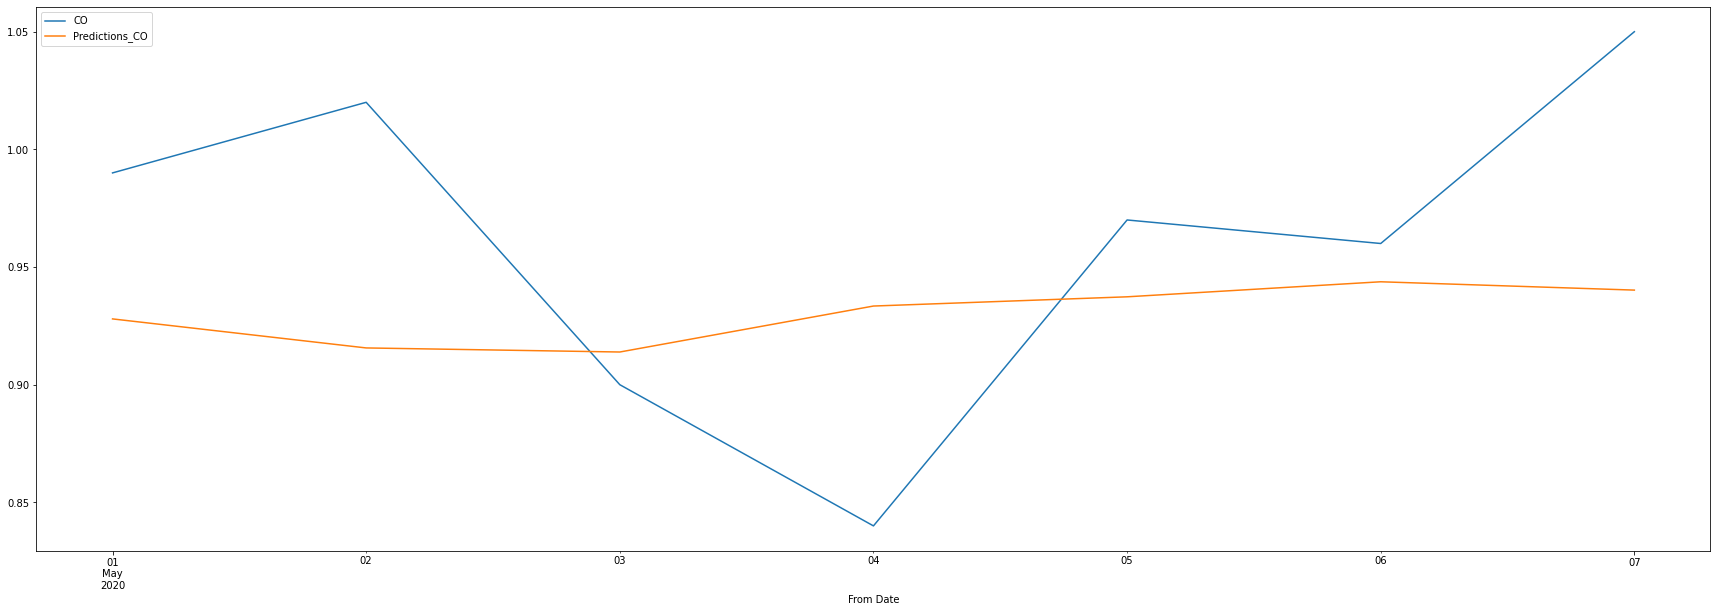

In [57]:
test_CO.plot(figsize=(30,10))

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
CO_MSE = mean_squared_error(test_CO['CO'], test_CO['Predictions_CO'])

In [60]:
CO_RMSE = math.sqrt(CO_MSE)
print('MSE: ',CO_MSE,'\n','RMSE: ',CO_RMSE)

MSE:  0.005293334559653977 
 RMSE:  0.07275530605841733


# Nitrogen Oxide

In [61]:
df_NO = pd.DataFrame(df['NO'])

#df_NO.head(2)

### To find `seasonality` in the recorded value

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose


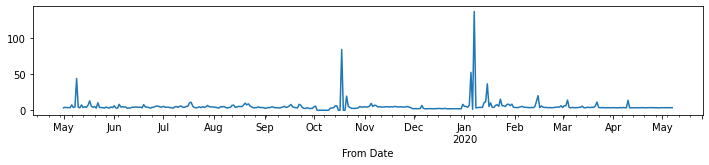

In [63]:
results_NO = seasonal_decompose(df_NO)
results_NO.observed.plot(figsize=(12,2))

#### `trend`

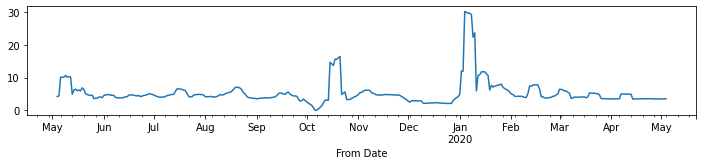

In [64]:
results_NO.trend.plot(figsize=(12,2))

#### 'Seasonality'

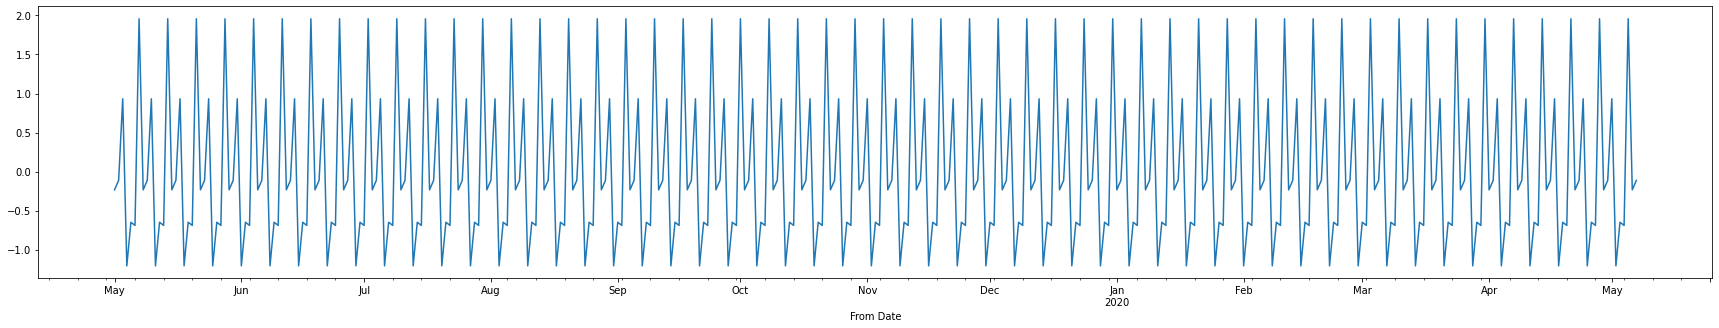

In [65]:
results_NO.seasonal.plot(figsize=(30,5))

#### `residual`

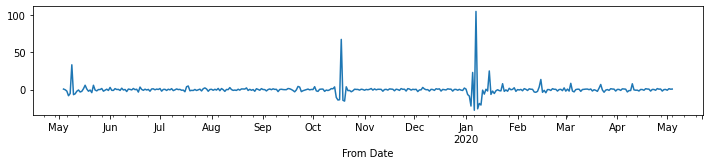

In [66]:
results_NO.resid.plot(figsize=(12,2))

#### `Data preprocessing`

In [67]:
train_NO = df_NO.iloc[:366]
test_NO = df_NO.iloc[366:]

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler_NO = MinMaxScaler()

In [70]:
# IGNORE WARNING ITS JUST NONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler_NO.fit(train_NO)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [71]:
scaled_train_NO = scaler_NO.transform(train_NO)
scaled_test_NO = scaler_NO.transform(test_NO)

In [72]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [73]:
scaled_train_NO

array([[0.02487562],
       [0.02955809],
       [0.02648522],
       [0.02714369],
       [0.02575359],
       [0.05399473],
       [0.02824115],
       [0.03372842],
       [0.32082236],
       [0.03109453],
       [0.02502195],
       [0.05362891],
       [0.02707053],
       [0.035777  ],
       [0.02882646],
       [0.05150717],
       [0.09503951],
       [0.0403863 ],
       [0.02941176],
       [0.03745976],
       [0.02172959],
       [0.07601697],
       [0.02838747],
       [0.027729  ],
       [0.02553409],
       [0.02180275],
       [0.03226514],
       [0.02553409],
       [0.02275388],
       [0.03292362],
       [0.02670471],
       [0.04558092],
       [0.02253439],
       [0.02165642],
       [0.05940884],
       [0.03285045],
       [0.03460638],
       [0.03219198],
       [0.03314311],
       [0.01960784],
       [0.02341235],
       [0.02297337],
       [0.03102136],
       [0.02977758],
       [0.03358209],
       [0.03226514],
       [0.02868013],
       [0.032

In [74]:
# define generator
n_input = 2
n_features = 1
generator_NO = TimeseriesGenerator(scaled_train_NO, scaled_train_NO, length=n_input, batch_size=1)

In [75]:
len(scaled_train_NO)

366

In [76]:
len(generator_NO)

364

In [77]:
scaled_train_NO

array([[0.02487562],
       [0.02955809],
       [0.02648522],
       [0.02714369],
       [0.02575359],
       [0.05399473],
       [0.02824115],
       [0.03372842],
       [0.32082236],
       [0.03109453],
       [0.02502195],
       [0.05362891],
       [0.02707053],
       [0.035777  ],
       [0.02882646],
       [0.05150717],
       [0.09503951],
       [0.0403863 ],
       [0.02941176],
       [0.03745976],
       [0.02172959],
       [0.07601697],
       [0.02838747],
       [0.027729  ],
       [0.02553409],
       [0.02180275],
       [0.03226514],
       [0.02553409],
       [0.02275388],
       [0.03292362],
       [0.02670471],
       [0.04558092],
       [0.02253439],
       [0.02165642],
       [0.05940884],
       [0.03285045],
       [0.03460638],
       [0.03219198],
       [0.03314311],
       [0.01960784],
       [0.02341235],
       [0.02297337],
       [0.03102136],
       [0.02977758],
       [0.03358209],
       [0.03226514],
       [0.02868013],
       [0.032

In [78]:
# What does the first batch look like?
X,y = generator_NO[0]

In [79]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.02487562 0.02955809]
Predict this y: 
 [[0.02648522]]


In [80]:

# Let's redefine to get 12 months back and then predict the next month out
n_input = 7
generator_NO = TimeseriesGenerator(scaled_train_NO, scaled_train_NO, length=n_input, batch_size=1)

In [81]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [82]:
# define model
model_NO = Sequential()
model_NO.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model_NO.add(Dense(1))
model_NO.compile(optimizer='adam', loss='mse')

In [83]:
model_NO.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [84]:
# fit model
model_NO.fit_generator(generator_NO,epochs=50)

Epoch 1/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0046
Epoch 2/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0047
Epoch 3/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0046
Epoch 4/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0046
Epoch 5/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0046
Epoch 6/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0046
Epoch 7/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0046
Epoch 8/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0046
Epoch 9/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0046
Epoch 10/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0046
Epoch 11/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0046
Epoch 12/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0045
Epoch 13/50
359/359 [====

In [85]:
model_NO.history.history.keys()

dict_keys(['loss'])

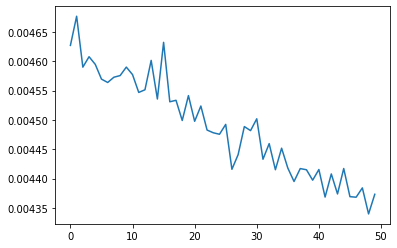

In [86]:
loss_per_epoch = model_NO.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [87]:
first_eval_batch_NO = scaled_train_NO[-7:]

first_eval_batch_NO

array([[0.02604624],
       [0.02677788],
       [0.02487562],
       [0.02604624],
       [0.0253146 ],
       [0.02377817],
       [0.02597308]])

In [88]:
first_eval_batch_NO = first_eval_batch_NO.reshape((1, n_input, n_features))

In [89]:
model_NO.predict(first_eval_batch_NO)

array([[0.03110535]], dtype=float32)

In [90]:
scaled_test_NO[0]

array([0.02575359])

In [91]:
test_predictions_NO = []

In [92]:
first_eval_batch_NO = scaled_train_NO[-n_input:]
current_batch_NO = first_eval_batch_NO.reshape((1, n_input, n_features))

In [93]:
current_batch_NO.shape

(1, 7, 1)

In [94]:
current_batch_NO

array([[[0.02604624],
        [0.02677788],
        [0.02487562],
        [0.02604624],
        [0.0253146 ],
        [0.02377817],
        [0.02597308]]])

In [95]:
np.append(current_batch_NO[:,1:,:],[[[99]]],axis=1)

array([[[2.67778753e-02],
        [2.48756219e-02],
        [2.60462394e-02],
        [2.53146035e-02],
        [2.37781680e-02],
        [2.59730758e-02],
        [9.90000000e+01]]])

In [96]:
test_predictions_NO = []

In [97]:
first_eval_batch_NO = scaled_train_NO[-n_input:]
current_batch_NO = first_eval_batch_NO.reshape((1, n_input, n_features))

In [98]:
for i in range(len(test_NO)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred_NO = model_NO.predict(current_batch_NO)[0]
    
    # store prediction
    test_predictions_NO.append(current_pred_NO) 
    
    # update batch to now include prediction and drop first value
    current_batch_NO = np.append(current_batch_NO[:,1:,:],[[current_pred_NO]],axis=1)

In [99]:
test_predictions_NO

[array([0.03110535], dtype=float32),
 array([0.03243872], dtype=float32),
 array([0.03293695], dtype=float32),
 array([0.03304819], dtype=float32),
 array([0.0330263], dtype=float32),
 array([0.03297831], dtype=float32),
 array([0.0329405], dtype=float32)]

In [100]:
scaled_test_NO

array([[0.02575359],
       [0.02538777],
       [0.02487562],
       [0.02589991],
       [0.02633889],
       [0.0261194 ],
       [0.02604624]])

In [101]:
true_predictions_NO = scaler_NO.inverse_transform(test_predictions_NO)

In [102]:
true_predictions_NO

array([[4.25147933],
       [4.43372395],
       [4.50182274],
       [4.51702612],
       [4.51403473],
       [4.50747506],
       [4.50230798]])

In [103]:
test_NO

,NO
From Date,
2020-05-01,3.52
2020-05-02,3.47
2020-05-03,3.40
2020-05-04,3.54
2020-05-05,3.60
2020-05-06,3.57
2020-05-07,3.56


In [104]:
# IGNORE WARNINGS
test_NO['Predictions_NO'] = true_predictions_NO

C:\Users\rahul\.conda\envs\tsa_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [105]:
test_NO

,NO,Predictions_NO
From Date,,
2020-05-01,3.52,4.251479
2020-05-02,3.47,4.433724
2020-05-03,3.40,4.501823
2020-05-04,3.54,4.517026
2020-05-05,3.60,4.514035
2020-05-06,3.57,4.507475
2020-05-07,3.56,4.502308


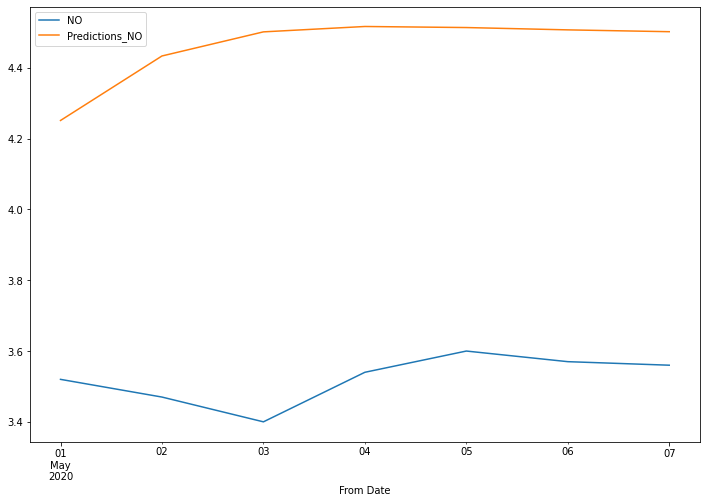

In [106]:
test_NO.plot(figsize=(12,8))

In [107]:
from sklearn.metrics import mean_squared_error

In [108]:
NO_MSE = mean_squared_error(test_NO['NO'], test_NO['Predictions_NO'])
NO_RMSE = math.sqrt(NO_MSE)
print('MSE: ',NO_MSE,'\n','RMSE: ',NO_RMSE)

MSE:  0.8906689384927573 
 RMSE:  0.9437525833038855


In [109]:
df_PM25 = pd.DataFrame(df['PM25'])

#df_PM25.head(2)


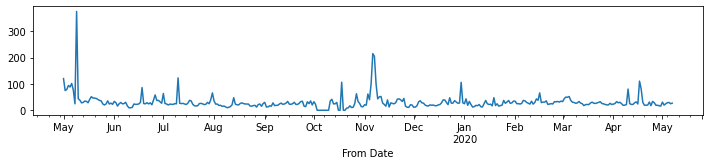

In [110]:

#from statsmodels.tsa.seasonal import seasonal_dePM25mpose

results_PM25 = seasonal_decompose(df_PM25)
results_PM25.observed.plot(figsize=(12,2))



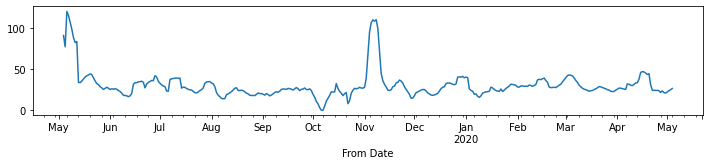

In [111]:
results_PM25.trend.plot(figsize=(12,2))



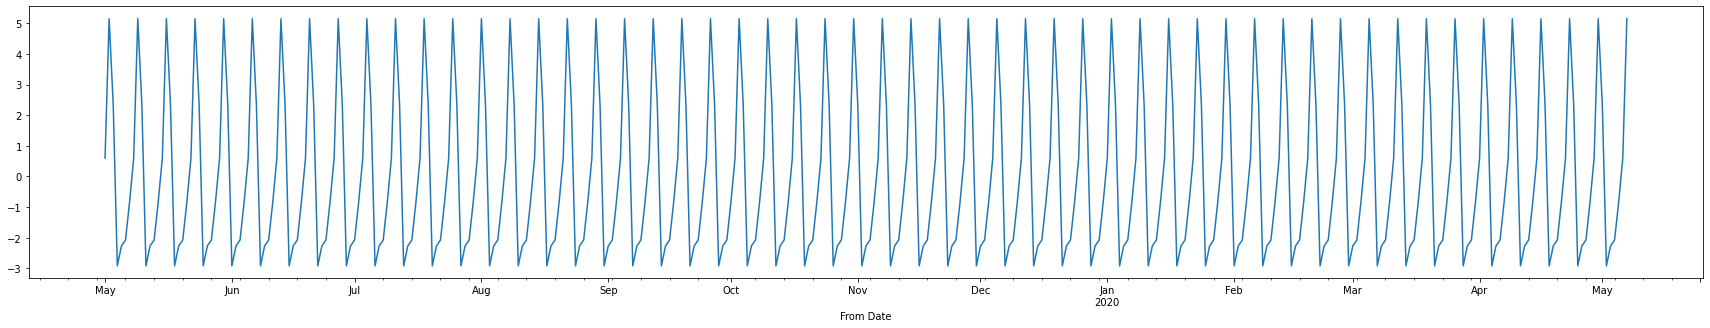

In [112]:
results_PM25.seasonal.plot(figsize=(30,5))

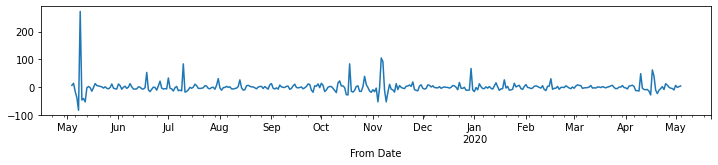

In [113]:
results_PM25.resid.plot(figsize=(12,2))

In [114]:
train_PM25 = df_PM25.iloc[:366]
test_PM25 = df_PM25.iloc[366:]

In [115]:
scaler_PM25 = MinMaxScaler()


In [116]:

# IGPM25RE WARNING ITS JUST PM25NVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler_PM25.fit(train_PM25)



MinMaxScaler(copy=True, feature_range=(0, 1))

In [117]:
scaled_train_PM25 = scaler_PM25.transform(train_PM25)
scaled_test_PM25 = scaler_PM25.transform(test_PM25)

scaled_train_PM25



array([[0.32044875],
       [0.19935666],
       [0.21041578],
       [0.25063803],
       [0.23559124],
       [0.27155997],
       [0.20326457],
       [0.06518503],
       [1.        ],
       [0.11707784],
       [0.10219056],
       [0.07507444],
       [0.07892918],
       [0.09291259],
       [0.0899883 ],
       [0.0758188 ],
       [0.10976712],
       [0.13744151],
       [0.12340493],
       [0.122953  ],
       [0.11981604],
       [0.10912909],
       [0.09939919],
       [0.09559762],
       [0.06398873],
       [0.05356763],
       [0.06361655],
       [0.09480009],
       [0.06313803],
       [0.07196406],
       [0.05973522],
       [0.08972246],
       [0.07717461],
       [0.04229583],
       [0.06606231],
       [0.07826457],
       [0.06486601],
       [0.06760421],
       [0.08049766],
       [0.0450872 ],
       [0.02461718],
       [0.0254413 ],
       [0.02884411],
       [0.06308486],
       [0.05984156],
       [0.05984156],
       [0.06393556],
       [0.078

In [118]:
# define generator
n_input = 2
n_features = 1
generator_PM25 = TimeseriesGenerator(scaled_train_PM25, scaled_train_PM25, length=n_input, batch_size=1)


scaled_train_PM25



array([[0.32044875],
       [0.19935666],
       [0.21041578],
       [0.25063803],
       [0.23559124],
       [0.27155997],
       [0.20326457],
       [0.06518503],
       [1.        ],
       [0.11707784],
       [0.10219056],
       [0.07507444],
       [0.07892918],
       [0.09291259],
       [0.0899883 ],
       [0.0758188 ],
       [0.10976712],
       [0.13744151],
       [0.12340493],
       [0.122953  ],
       [0.11981604],
       [0.10912909],
       [0.09939919],
       [0.09559762],
       [0.06398873],
       [0.05356763],
       [0.06361655],
       [0.09480009],
       [0.06313803],
       [0.07196406],
       [0.05973522],
       [0.08972246],
       [0.07717461],
       [0.04229583],
       [0.06606231],
       [0.07826457],
       [0.06486601],
       [0.06760421],
       [0.08049766],
       [0.0450872 ],
       [0.02461718],
       [0.0254413 ],
       [0.02884411],
       [0.06308486],
       [0.05984156],
       [0.05984156],
       [0.06393556],
       [0.078

In [119]:

n_input = 7
generator_PM25 = TimeseriesGenerator(scaled_train_PM25, scaled_train_PM25, length=n_input, batch_size=1)

# What does the first batch look like?
X,y = generator_PM25[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')




Given the Array: 
[0.32044875 0.19935666 0.21041578 0.25063803 0.23559124 0.27155997
 0.20326457]
Predict this y: 
 [[0.06518503]]


In [120]:
# define model
model_PM25 = Sequential()
model_PM25.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model_PM25.add(Dense(1))
model_PM25.compile(optimizer='adam', loss='mse')




In [121]:
model_PM25.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [122]:
# fit model
model_PM25.fit_generator(generator_PM25,epochs=50)



Epoch 1/50
359/359 [==============================] - 1s 4ms/step - loss: 0.0053
Epoch 2/50
359/359 [==============================] - 1s 4ms/step - loss: 0.0051
Epoch 3/50
359/359 [==============================] - 2s 4ms/step - loss: 0.0051
Epoch 4/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0051
Epoch 5/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0050
Epoch 6/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0050
Epoch 7/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0050
Epoch 8/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0050
Epoch 9/50
359/359 [==============================] - 1s 4ms/step - loss: 0.0050
Epoch 10/50
359/359 [==============================] - 2s 6ms/step - loss: 0.0049
Epoch 11/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0049
Epoch 12/50
359/359 [==============================] - 2s 5ms/step - loss: 0.0049
Epoch 13/50
359/359 [====

In [123]:
model_PM25.history.history.keys()



dict_keys(['loss'])

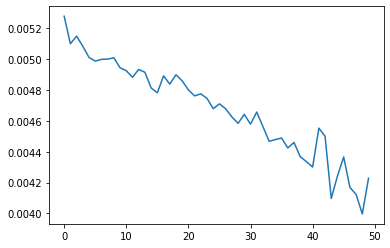

In [124]:
loss_per_epoch = model_PM25.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [125]:
first_eval_batch_PM25 = scaled_train_PM25[-7:]

first_eval_batch_PM25

array([[0.04705444],
       [0.08927052],
       [0.07682901],
       [0.05082943],
       [0.05024458],
       [0.04585815],
       [0.04205657]])

In [126]:
first_eval_batch_PM25 = first_eval_batch_PM25.reshape((1, n_input, n_features))

model_PM25.predict(first_eval_batch_PM25)

array([[0.0544068]], dtype=float32)

In [127]:
scaled_test_PM25[0]



array([0.0823054])

In [128]:
test_predictions_PM25 = []

first_eval_batch_PM25 = scaled_train_PM25[-n_input:]
current_batch_PM25 = first_eval_batch_PM25.reshape((1, n_input, n_features))

current_batch_PM25.shape



(1, 7, 1)

In [129]:
current_batch_PM25

array([[[0.04705444],
        [0.08927052],
        [0.07682901],
        [0.05082943],
        [0.05024458],
        [0.04585815],
        [0.04205657]]])

In [130]:
np.append(current_batch_PM25[:,1:,:],[[[99]]],axis=1)

array([[[8.92705232e-02],
        [7.68290089e-02],
        [5.08294343e-02],
        [5.02445768e-02],
        [4.58581455e-02],
        [4.20565717e-02],
        [9.90000000e+01]]])

In [131]:
test_predictions_PM25 = []

first_eval_batch_PM25 = scaled_train_PM25[-n_input:]
current_batch_PM25 = first_eval_batch_PM25.reshape((1, n_input, n_features))

for i in range(len(test_PM25)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred_PM25 = model_PM25.predict(current_batch_PM25)[0]
    
    # store prediction
    test_predictions_PM25.append(current_pred_PM25) 
    
    # update batch to PM25w include prediction and drop first value
    current_batch_PM25 = np.append(current_batch_PM25[:,1:,:],[[current_pred_PM25]],axis=1)

test_predictions_PM25



[array([0.0544068], dtype=float32),
 array([0.06100041], dtype=float32),
 array([0.06694075], dtype=float32),
 array([0.07555207], dtype=float32),
 array([0.0847946], dtype=float32),
 array([0.09566732], dtype=float32),
 array([0.10389522], dtype=float32)]

In [132]:
scaled_test_PM25

array([[0.0823054 ],
       [0.05226499],
       [0.06497235],
       [0.07600489],
       [0.07919502],
       [0.06611548],
       [0.0718843 ]])

In [133]:
true_predictions_PM25 = scaler_PM25.inverse_transform(test_predictions_PM25)

true_predictions_PM25


array([[20.46566305],
       [22.9459158 ],
       [25.18043427],
       [28.41966614],
       [31.89633517],
       [35.98621815],
       [39.08122489]])

In [134]:
test_PM25

,PM25
From Date,
2020-05-01,30.96
2020-05-02,19.66
2020-05-03,24.44
2020-05-04,28.59
2020-05-05,29.79
2020-05-06,24.87
2020-05-07,27.04


In [135]:
# IGPM25RE WARNINGS
test_PM25['Predictions_PM25'] = true_predictions_PM25

test_PM25


C:\Users\rahul\.conda\envs\tsa_course\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PM25,Predictions_PM25
From Date,,
2020-05-01,30.96,20.465663
2020-05-02,19.66,22.945916
2020-05-03,24.44,25.180434
2020-05-04,28.59,28.419666
2020-05-05,29.79,31.896335
2020-05-06,24.87,35.986218
2020-05-07,27.04,39.081225


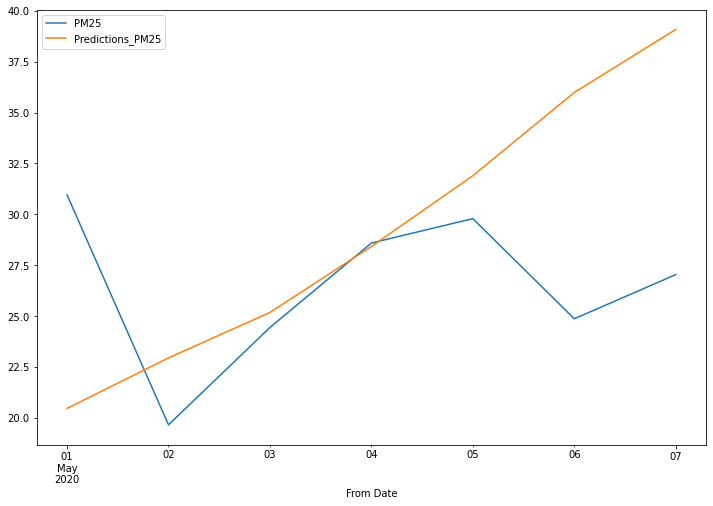

In [136]:
test_PM25.plot(figsize=(12,8))


In [137]:
PM25_MSE = mean_squared_error(test_PM25['PM25'], test_PM25['Predictions_PM25'])

PM25_RMSE = math.sqrt(PM25_MSE)
print('MSE: ',PM25_MSE,'\n','RMSE: ',PM25_RMSE)

MSE:  56.357665426285955 
 RMSE:  7.507174263748375
